Adjusted Rand Index: 0.3543677286753995


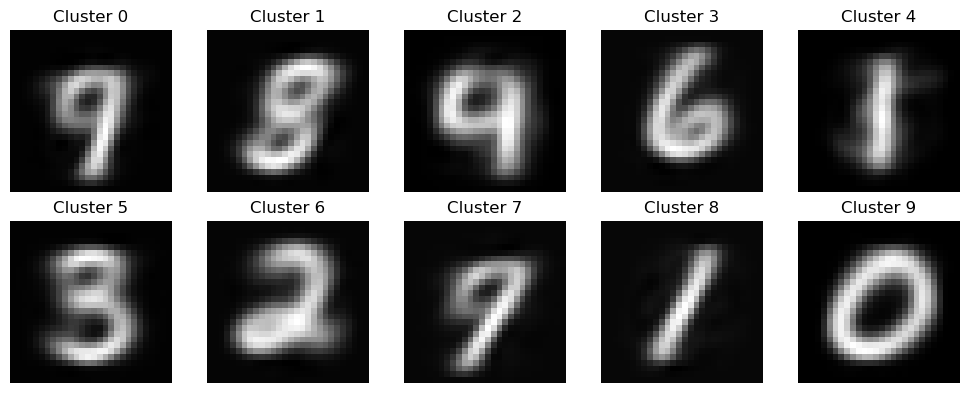

AttributeError: module 'matplotlib.pyplot' has no attribute 'sub'

<Figure size 1000x400 with 0 Axes>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

# Step 1: Load MNIST
mnist = fetch_openml(
    'mnist_784',
    version=1,
    as_frame=False,
    parser='auto'
)

X = mnist.data / 255.0
y = mnist.target.astype(int)

# Step 2: Use SMALL SUBSET (VERY IMPORTANT)
X_train = X[:10000]
y_train = y[:10000]

X_test = X[10000:12000]
y_test = y[10000:12000]

# Step 3: PCA (784 → 50)
pca = PCA(n_components=50, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 4: KMeans
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(X_train_pca)

# Step 5: Predict
test_labels = kmeans.predict(X_test_pca)

# Step 6: Evaluation
print("Adjusted Rand Index:", adjusted_rand_score(y_test, test_labels))

# Step 7: Visualize cluster centers (approximate)
centers = pca.inverse_transform(kmeans.cluster_centers_).reshape(10, 28, 28)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centers[i], cmap="gray")
    plt.title(f"Cluster {i}")
    plt.axis("off")

plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.sub
